In [1]:
from torchvision import datasets, transforms, utils
from torch.utils import data 

#torch.utils.data
#데이터 로드

#torchvision.utils
#데이터 저장 및 시각화하기 위한 도구가 들어있는 모듈

import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
## transform: 텐서로 변환, 크기 조절(resize), 크롭(crop), 밝기(brightness), 대비(contrast)등 사용 가능
transform = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
#FashionMNIST 데이터 로드
trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True,
    download = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root = './.data/',
    train = False,
    download = True,
    transform = transform
)

In [4]:
batch_size = 16
train_loader = data.DataLoader(
    dataset= trainset,
    batch_size = batch_size
)
test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

In [5]:
## for문 사용하지 않고 iter()함수를 사용할 수 있음
## iter()로 반복문 안에서 이용할 수 있도록 만들어준 뒤, next()함수를 이용하여 배치 1개를 가져옴
dataiter = iter(train_loader)
images, labels = next(dataiter)

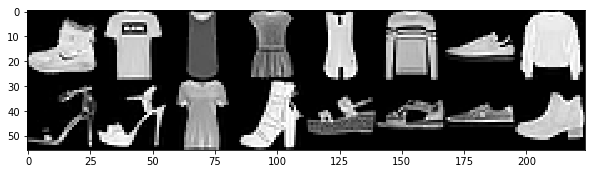

In [6]:
img = utils.make_grid(images, padding = 0) #make_grid()는 여러 이미지를 모아 하나의 이미지로 만들 수 있음
npimg = img.numpy() #img는 파이토치의 텐서이므로, numpy로 바꿔줌
plt.figure(figsize = (10,7))
plt.imshow(np.transpose(npimg, (1,2,0))) #np.transpose를 사용하여 0번째 차원을 맨 뒤로 보내기 -> batchsize
plt.show()

In [7]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [8]:
for label in labels:
    index = label.item()
    #print(CLASSES[index])

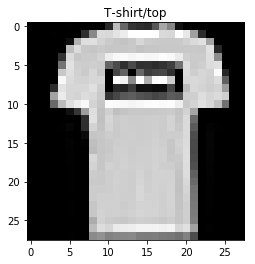

In [9]:
#개별 이미지 확인하기
idx = 1
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap= 'gray')
plt.show()

### 인공 신경망으로 패션 아이템 분류하기

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [11]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [12]:
EPOCHS = 30
BATCH_SIZE = 64

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
model = Net().to(DEVICE)
optimizer  = optim.SGD(model.parameters(), lr = 0.01)

In [15]:
## train 함수에 model, 학습할 데이터, 최적화를 담당할 optimizer
def train(model, train_loader, optimizer):
    model.train() #모델을 학습모드로 바꾸기
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()#반복때마다 기울기 새로 계산 
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [16]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target  = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            
            #모든 오차 더하기
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            
            #가장 큰 값을 가진 클래스가 모델의 예측이다.
            #예측과 정답을 비교하여 일치할 경우 correct에 1을 더함
            pred = output.max(1, keepdim= True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct/len(test_loader.dataset)
    return test_loss, test_accuracy

In [17]:
for epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print("[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%" .format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5612, Accuracy: 80.24%
[2] Test Loss: 0.4877, Accuracy: 82.44%
[3] Test Loss: 0.4510, Accuracy: 83.83%
[4] Test Loss: 0.4264, Accuracy: 84.74%
[5] Test Loss: 0.4077, Accuracy: 85.27%
[6] Test Loss: 0.3935, Accuracy: 86.00%
[7] Test Loss: 0.3836, Accuracy: 86.21%
[8] Test Loss: 0.3750, Accuracy: 86.53%
[9] Test Loss: 0.3673, Accuracy: 86.97%
[10] Test Loss: 0.3623, Accuracy: 87.09%
[11] Test Loss: 0.3567, Accuracy: 87.25%
[12] Test Loss: 0.3533, Accuracy: 87.39%
[13] Test Loss: 0.3495, Accuracy: 87.60%
[14] Test Loss: 0.3465, Accuracy: 87.79%
[15] Test Loss: 0.3434, Accuracy: 87.86%
[16] Test Loss: 0.3420, Accuracy: 87.98%
[17] Test Loss: 0.3417, Accuracy: 87.95%
[18] Test Loss: 0.3386, Accuracy: 88.14%
[19] Test Loss: 0.3389, Accuracy: 88.15%
[20] Test Loss: 0.3359, Accuracy: 88.20%
[21] Test Loss: 0.3318, Accuracy: 88.56%
[22] Test Loss: 0.3332, Accuracy: 88.64%
[23] Test Loss: 0.3302, Accuracy: 88.66%
[24] Test Loss: 0.3324, Accuracy: 88.65%
[25] Test Loss: 0.3324, A

### 과적합, 과소적합 막기 위한 방법
- 조기종료
- data augmentation
- dropout

In [23]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                  train = True,
                  download = True,
                  transform = transforms.Compose([
                      transforms.RandomHorizontalFlip(),
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,),(0.3081,))
                  ])),
    batch_size = BATCH_SIZE, shuffle = True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                  train = False,
                  transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,),(0.3081,))
                  ])),
    batch_size = BATCH_SIZE, shuffle = True)

Extracting ./.data\MNIST\raw\train-images-idx3-ubyte.gz to ./.data\MNIST\raw


Extracting ./.data\MNIST\raw\train-labels-idx1-ubyte.gz to ./.data\MNIST\raw



Extracting ./.data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./.data\MNIST\raw


Extracting ./.data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./.data\MNIST\raw
Processing...
Done!


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [24]:
## dropout
### nn.Dropout & F.dropout: 클래스를 쓰느냐 함수를 쓰느냐 차이

class Net(nn.Module):
    def __init__(self, dropout_p = 0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout_p = dropout_p
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        
        # 드롭아웃 추가
        x = F.dropout(x, training = self.training, p = self.dropout_p)
        x = F.relu(self.fc2(x))
        
        # 드롭아웃 추가
        x = F.dropout(x, training = self.training, p = self.dropout_p)
        x = self.fc3(x)
        return x

In [25]:
model = Net(dropout_p = 0.2).to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [26]:
for epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print("[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%" .format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5497, Accuracy: 82.03%
[2] Test Loss: 0.4273, Accuracy: 86.25%
[3] Test Loss: 0.3561, Accuracy: 88.84%
[4] Test Loss: 0.3003, Accuracy: 90.77%
[5] Test Loss: 0.2622, Accuracy: 91.86%
[6] Test Loss: 0.2385, Accuracy: 92.59%
[7] Test Loss: 0.2106, Accuracy: 93.51%
[8] Test Loss: 0.1978, Accuracy: 93.87%
[9] Test Loss: 0.1851, Accuracy: 94.29%
[10] Test Loss: 0.1698, Accuracy: 94.68%
[11] Test Loss: 0.1645, Accuracy: 95.01%
[12] Test Loss: 0.1573, Accuracy: 95.18%
[13] Test Loss: 0.1508, Accuracy: 95.42%
[14] Test Loss: 0.1431, Accuracy: 95.57%
[15] Test Loss: 0.1423, Accuracy: 95.65%
[16] Test Loss: 0.1362, Accuracy: 95.81%
[17] Test Loss: 0.1293, Accuracy: 96.13%
[18] Test Loss: 0.1287, Accuracy: 96.08%
[19] Test Loss: 0.1225, Accuracy: 96.35%
[20] Test Loss: 0.1196, Accuracy: 96.27%
[21] Test Loss: 0.1192, Accuracy: 96.35%
[22] Test Loss: 0.1164, Accuracy: 96.36%
[23] Test Loss: 0.1117, Accuracy: 96.55%
[24] Test Loss: 0.1141, Accuracy: 96.37%
[25] Test Loss: 0.1086, A